## Fetch the Data and Visualize Data

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


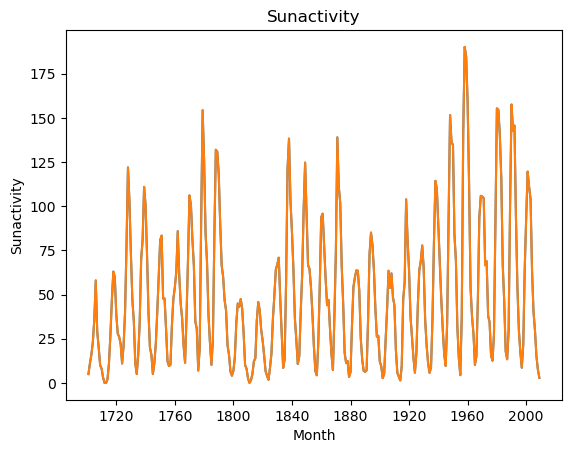

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read the data from the CSV file
df = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]
df.index = pd.date_range(start='1700', end='2009', freq='A')


df['Passengers'] = df
plt.plot(df)
plt.xlabel('Month')
plt.ylabel('Sunactivity')
plt.title('Sunactivity')
plt.show()

## Determine p,d,q,s parameters and clear trend and seasonality

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


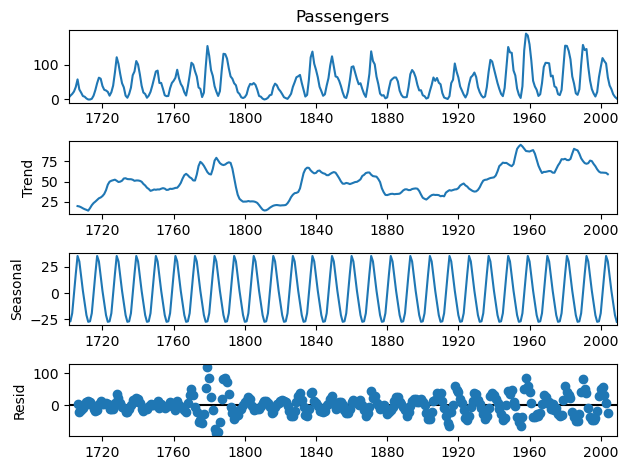

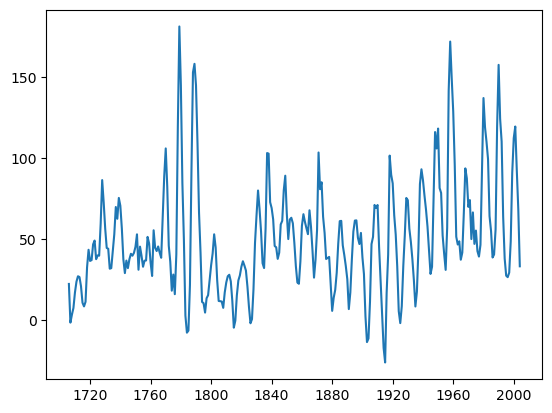

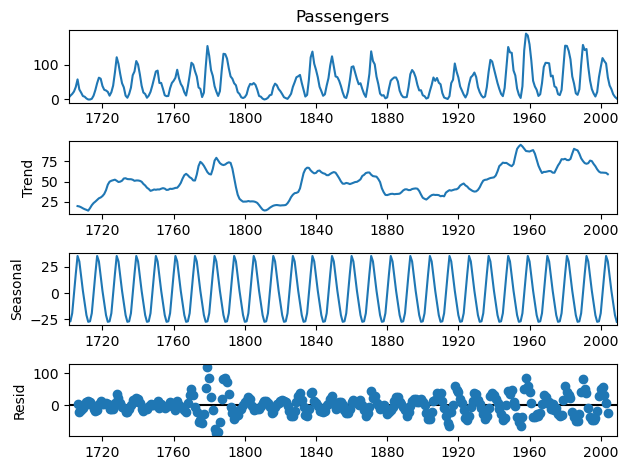

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# d = # of differencing

# First, test for stationarity

result = adfuller(df['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# s = seasonality component
s = 11
df 
# Then, decompose the series to find the seasonal component
decomposition = sm.tsa.seasonal_decompose(df['Passengers'], model='additive', period=s)

train_size = int(len(df) * 0.8)
test_size = int(len(df) * 0.2)

df['trend'] = decomposition.trend

df['seasonal'] = decomposition.seasonal

df['normalized_residual'] = df['Passengers'] - df['seasonal']




df.dropna(inplace=True)  # Drop rows with NaN values
# Detrend and deseasonalize by dividing by the trend and seasonal components
df['detrended'] = df['Passengers'] / df['trend']
df['deseasonalized'] = df['detrended'] / df['seasonal']

plt.plot(df['normalized_residual'])

decomposition.plot()

In [3]:

# Normalized residual
#df['normalized_residual']=(df['residual'] - df['residual'].min()) / (df['residual'].max() - df['residual'].min())
#plt.plot(df['normalized_residual'])


In [4]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# p = AR component
p = 3

for i in range(1, p+1):
    df[f'lag_{i}'] = df['normalized_residual'].shift(i)


# q = MA component
q = 2

df['rolling_mean'] = df['normalized_residual'].rolling(window=q).mean()

df.dropna(inplace=True)  # Drop rows with NaN values

df

,SUNACTIVITY,Passengers,trend,seasonal,normalized_residual,detrended,deseasonalized,lag_1,lag_2,lag_3,rolling_mean
1708-12-31,10.0,10.0,17.181818,2.327787,7.672213,0.582011,0.250027,3.541574,-1.340870,22.490948,5.606894
1709-12-31,8.0,8.0,16.090909,-9.171540,17.171540,0.497175,-0.054208,7.672213,3.541574,-1.340870,12.421877
1710-12-31,3.0,3.0,15.272727,-20.872213,23.872213,0.196429,-0.009411,17.171540,7.672213,3.541574,20.521877
1711-12-31,0.0,0.0,14.272727,-27.227096,27.227096,0.000000,-0.000000,23.872213,17.171540,7.672213,25.549655
1712-12-31,0.0,0.0,17.363636,-26.747634,26.747634,0.000000,-0.000000,27.227096,23.872213,17.171540,26.987365
...,...,...,...,...,...,...,...,...,...,...,...
1999-12-31,93.3,93.3,61.254545,-19.075580,112.375580,1.523152,-0.079848,91.047634,48.727096,29.472213,101.711607
2000-12-31,119.6,119.6,61.245455,0.105901,119.494099,1.952798,18.439844,112.375580,91.047634,48.727096,115.934840
2001-12-31,111.0,111.0,61.036364,18.352029,92.647971,1.818588,0.099095,119.494099,112.375580,91.047634,106.071035
2002-12-31,104.0,104.0,60.936364,35.509052,68.490948,1.706698,0.048064,92.647971,119.494099,112.375580,80.569460


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # for example

# Select features and target
X = df[['lag_1', 'lag_2', 'lag_3', 'rolling_mean']]
y = df['normalized_residual']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



## Bayesian Oprimization for Hyperparameter Tuning

In [6]:
from sklearn.model_selection import KFold
from skopt import BayesSearchCV
from skopt.plots import plot_objective, plot_histogram
import skopt
import numpy as np
from sklearn.svm import SVR

# Decleartions for deprecated functions in numpy
np.float = float    
np.int = int    
np.object = object    
np.bool = bool    

# Define hyperparameters for bayesian optimization
param_space = {
    'kernel': ['rbf', 'sigmoid', 'poly', 'linear'],
    'C': (1e-6, 1e+1, 'log-uniform'),
    'gamma': (1e-6, 1e+1, 'log-uniform'),
    'epsilon': (1e-6, 1e+6, 'log-uniform')
    }


kFold = KFold(n_splits=3, shuffle=True, random_state=10)

model = SVR()

bayes_search = BayesSearchCV(estimator=model, search_spaces=param_space, cv= kFold, n_jobs=-1, 
                             scoring='neg_mean_absolute_percentage_error', n_iter=5)

bayes_search.fit(X_train, y_train)

# Print the cross validation results
cv_results = bayes_search.cv_results_
cv_results_df = pd.DataFrame(cv_results)

cv_results_df['kernel'] = cv_results_df['params'].apply(lambda x: x['kernel'])
cv_results_df['C'] = cv_results_df['params'].apply(lambda x: x['C'])
cv_results_df['gamma'] = cv_results_df['params'].apply(lambda x: x['gamma'])
cv_results_df['epsilon'] = cv_results_df['params'].apply(lambda x: x['epsilon'])


print(cv_results_df[['mean_test_score', 'kernel', 'C', 'gamma', 'epsilon']])

# plot_objective creates pairwise dependence plot of the objective function.
# plot_objective(bayes_search.optimizer_results_[0],
#                    dimensions=["C", "gamma", "epsilon"],
#                    n_minimum_search=int(1e8))

# Print the best hyperparameters
print('Best hyperparameters:', bayes_search.best_params_)

best_model = bayes_search.best_estimator_

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


60


,normalized_residual
1944-12-31,28.675580
1945-12-31,33.094099
1946-12-31,74.247971
1947-12-31,116.090948
1948-12-31,105.959130
1949-12-31,118.241574
1950-12-31,81.572213
1951-12-31,78.571540
1952-12-31,52.372213
1953-12-31,41.127096


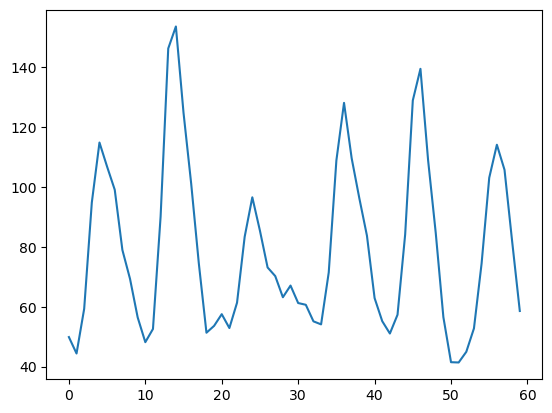

In [7]:

best_model.fit(X_train, y_train)

# Predict residuals
residuals_predicted = best_model.predict(X_test)
plt.plot(residuals_predicted)
print(len(residuals_predicted))
test_df = pd.DataFrame(y_test)
test_df

In [8]:
df['trend_train'] = df['trend'][:train_size]
df['trend_test'] = df['trend'][train_size:]
df['seasonal_train'] = df['seasonal'][:train_size]
df['seasonal_test'] = df['seasonal'][train_size:]
print(df['seasonal'][train_size:].shape)
print(df['seasonal_test'].shape)

(49,)
(296,)


(60,)
(296,)
(296,)
DatetimeIndex(['1944-12-31', '1945-12-31', '1946-12-31', '1947-12-31',
               '1948-12-31', '1949-12-31', '1950-12-31', '1951-12-31',
               '1952-12-31', '1953-12-31', '1954-12-31', '1955-12-31',
               '1956-12-31', '1957-12-31', '1958-12-31', '1959-12-31',
               '1960-12-31', '1961-12-31', '1962-12-31', '1963-12-31',
               '1964-12-31', '1965-12-31', '1966-12-31', '1967-12-31',
               '1968-12-31', '1969-12-31', '1970-12-31', '1971-12-31',
               '1972-12-31', '1973-12-31', '1974-12-31', '1975-12-31',
               '1976-12-31', '1977-12-31', '1978-12-31', '1979-12-31',
               '1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', 

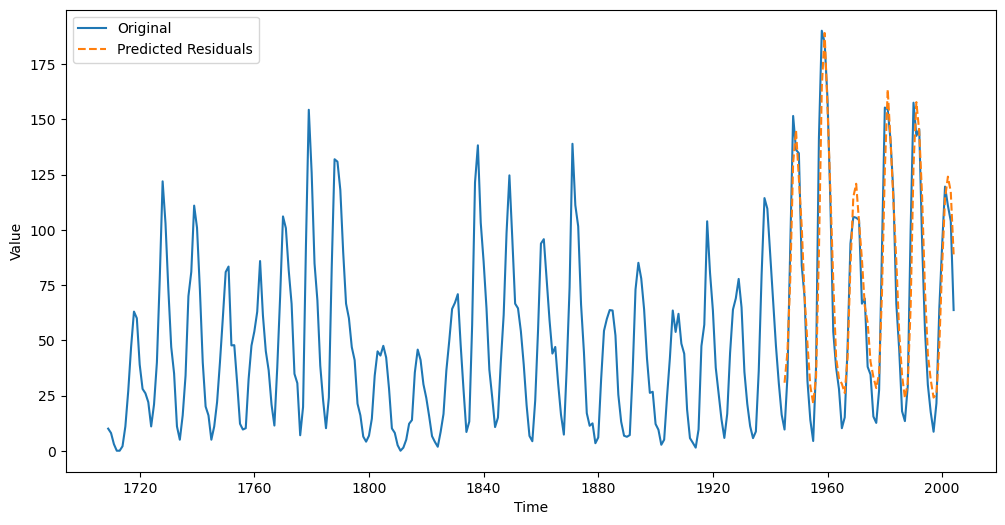

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for the predicted residuals
residuals_predicted_df = pd.DataFrame(residuals_predicted, index=X_test.index, columns=['predicted_residuals'])

# Denormalize data
#residuals_predicted_df = (residuals_predicted_df - residuals_predicted_df.min()) / (residuals_predicted_df.max() - residuals_predicted_df.min())

print(residuals_predicted_df['predicted_residuals'].shape)
print(df['seasonal_test'].shape)
print(df['trend_test'].shape)
# Add trend and seasonality back to the perdicted residual
residuals_predicted_df['reconstructed'] =  residuals_predicted_df['predicted_residuals'] + df['seasonal']


# Plot
fig, ax = plt.subplots(figsize=(12,6))

# Plot the latter part of the original time series
ax.plot(df.loc[df.index, 'Passengers'], label='Original')

# Plot the predicted residuals
ax.plot(residuals_predicted_df['reconstructed'], label='Predicted Residuals', linestyle='--')

print(residuals_predicted_df['reconstructed'].index)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import math

# Assuming 'Passengers' is your original data and 'reconstructed' is your predicted data
mse = mean_squared_error(df.loc[X_test.index, 'Passengers'], residuals_predicted_df['reconstructed'])
rmse = math.sqrt(mse)
nrmse = rmse / (df.loc[X_test.index, 'Passengers'].max() - df.loc[X_test.index, 'Passengers'].min())
r2e = r2_score(df.loc[X_test.index, 'Passengers'], residuals_predicted_df['reconstructed'])
mape = mean_absolute_percentage_error(df.loc[X_test.index, 'Passengers'], residuals_predicted_df['reconstructed'])

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Normalized Root Mean Squared Error:", nrmse)
print("R Squared Error: ", r2e)
print("MAPE", mape)

Mean Squared Error:  270.1714705784742
Root Mean Squared Error:  16.436893580554514
Normalized Root Mean Squared Error: 0.08846551980922775
R Squared Error:  0.9001905213638993
MAPE 0.42094571994932617
